In [73]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            img = img.convert('L')
            img = img.resize((28, 28))
            img_array = np.array(img).flatten()
            images.append(img_array)
    return images

def pca_svd(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    
    U_matrix = U[:, :n_components]
    S_matrix = np.diag(S[:n_components])
    Vt_matrix = Vt[:n_components, :]

    X_reconstructed = np.dot(U_matrix, np.dot(S_matrix, Vt_matrix)) + X_mean
    
    return X_reconstructed, Vt_matrix, U_matrix, S_matrix

def show_images_multiple_reconstructions(original_images, reconstructed_images_list, image_shape, components_list):
    num_images = len(original_images)
    num_reconstructions = len(reconstructed_images_list)
    
    plt.figure(figsize=(15, 2 * (num_reconstructions + 1)))
    
    for i in range(num_images):
        # Imagen original
        plt.subplot(num_reconstructions + 1, num_images, i + 1)
        plt.imshow(original_images[i].reshape(image_shape), cmap='gray')
        if i == 0: plt.title('Original')
        plt.axis('off')
        
        for j in range(num_reconstructions):
            plt.subplot(num_reconstructions + 1, num_images, (j + 1) * num_images + i + 1)
            plt.imshow(reconstructed_images_list[j][i].reshape(image_shape), cmap='gray')
            if i == 0: plt.title(f'd={components_list[j]}')
            plt.axis('off')
    
    plt.show()

def euclinean_distance(xi, xj, sigma):
    return np.exp(-(np.linalg.norm(xi - xj)**2) / (2 * sigma ** 2))

def similarity_matrix(matriz, sigma):
    n = matriz.shape[0]
    s = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s[i, j] = euclinean_distance(matriz[i, :], matriz[j, :], sigma)
    return s

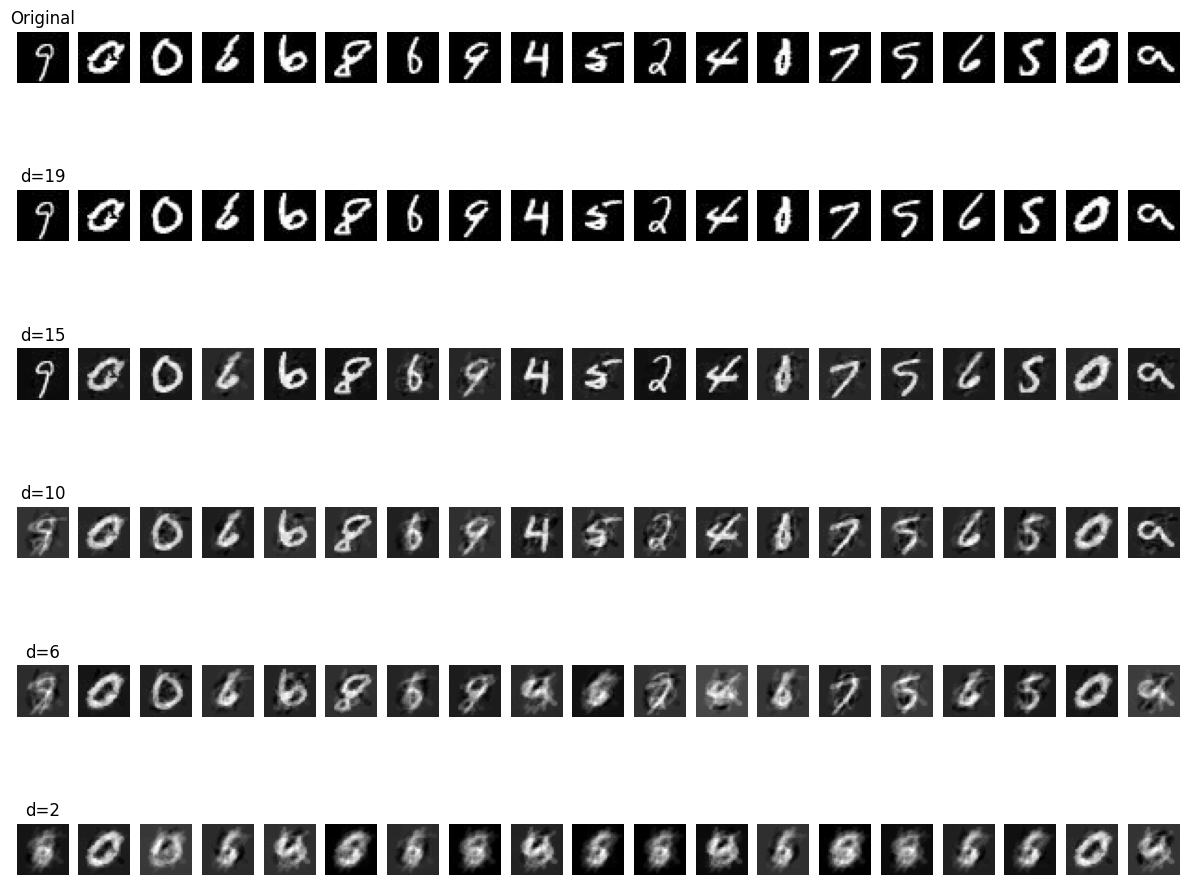

In [74]:
# 1 y 2
images = load_images_from_folder('datasets_imgs')
images_matrix = np.array(images)

components_list = [19, 15, 10, 6, 2]
reconstructed_images_list = []

for n_components in components_list:
    images_reconstructed, _, _, _ = pca_svd(images_matrix, n_components)
    reconstructed_images_list.append(images_reconstructed)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix, reconstructed_images_list, image_shape, components_list)


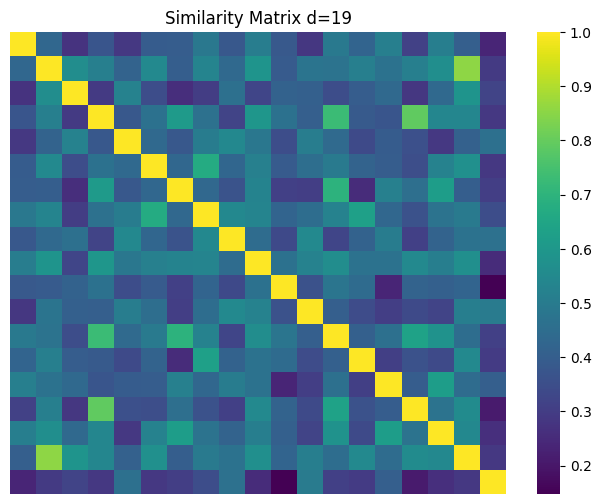

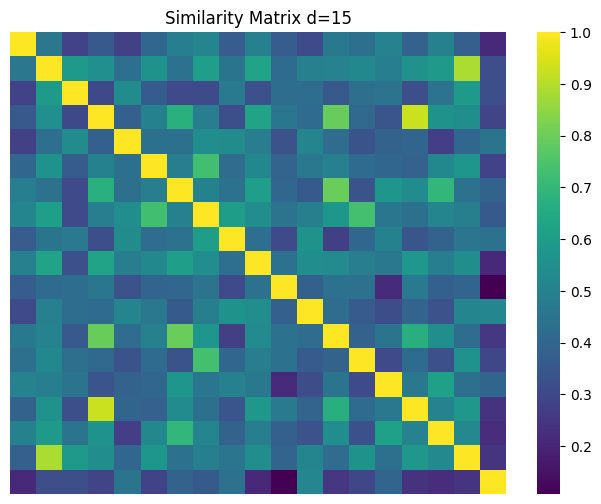

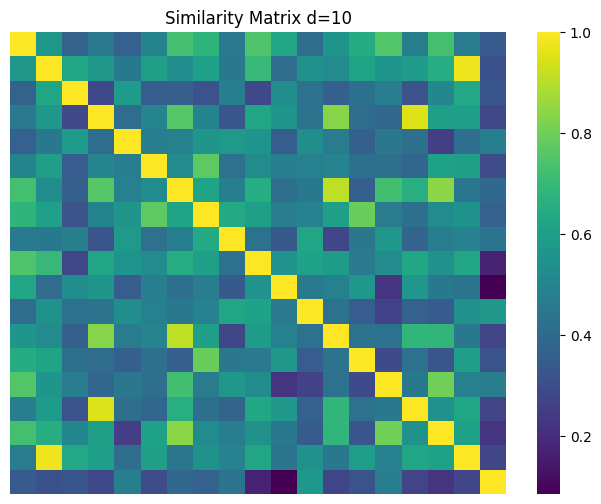

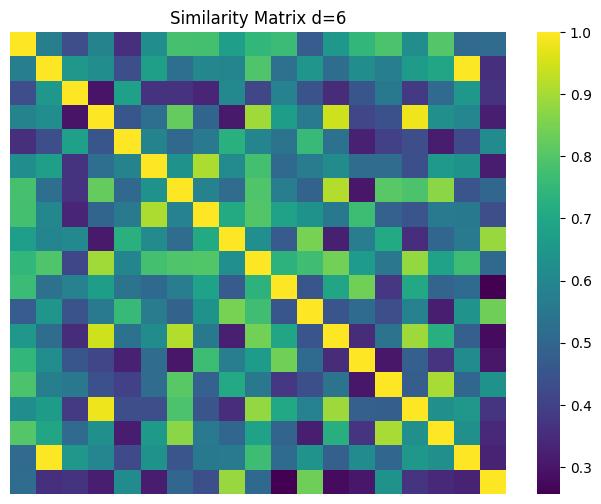

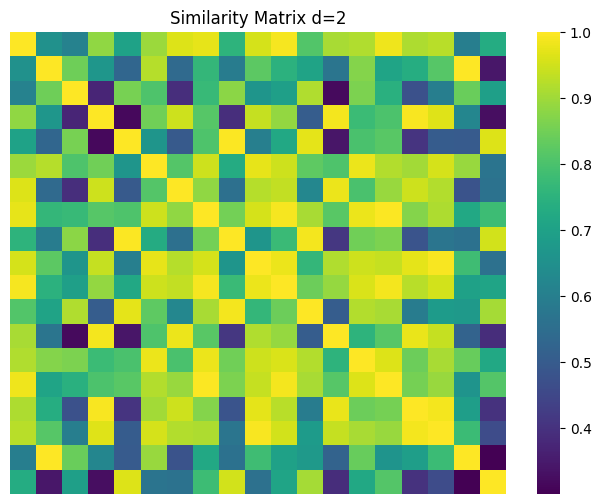

In [75]:
# 3
# sigma_values = [0.01, 0.1, 1, 100]

# fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# for i, sigma in enumerate(sigma_values):
#     s = similarity_matrix(reconstructed_images_list[0], sigma)
#     axs[i].imshow(s, cmap='viridis', aspect='auto')
#     axs[i].set_title(f'Sigma = {sigma}')
#     axs[i].set_xlabel('Columnas')
#     axs[i].set_ylabel('Filas')
# plt.title('Matriz de similaridad con sigma = 0.01, 0.1, 1, 10 y d = 19')
# plt.show()

for i, reconstructed_images in enumerate(reconstructed_images_list):
        similarity_matrix = cosine_similarity(reconstructed_images)
        plt.figure(figsize=(8, 6))
        sns.heatmap(similarity_matrix, cmap='viridis')
        plt.title(f'Similarity Matrix d={components_list[i]}')
        plt.axis('off')
        plt.show()

In [76]:
# frobenius
for a in reconstructed_images_list:
    print(np.linalg.norm(images_matrix-a)/np.linalg.norm(images_matrix)) #Error relativo


1.3728483587388265e-15
0.16304232647275751
0.307858506997879
0.44064608166117863
0.6099253595133531


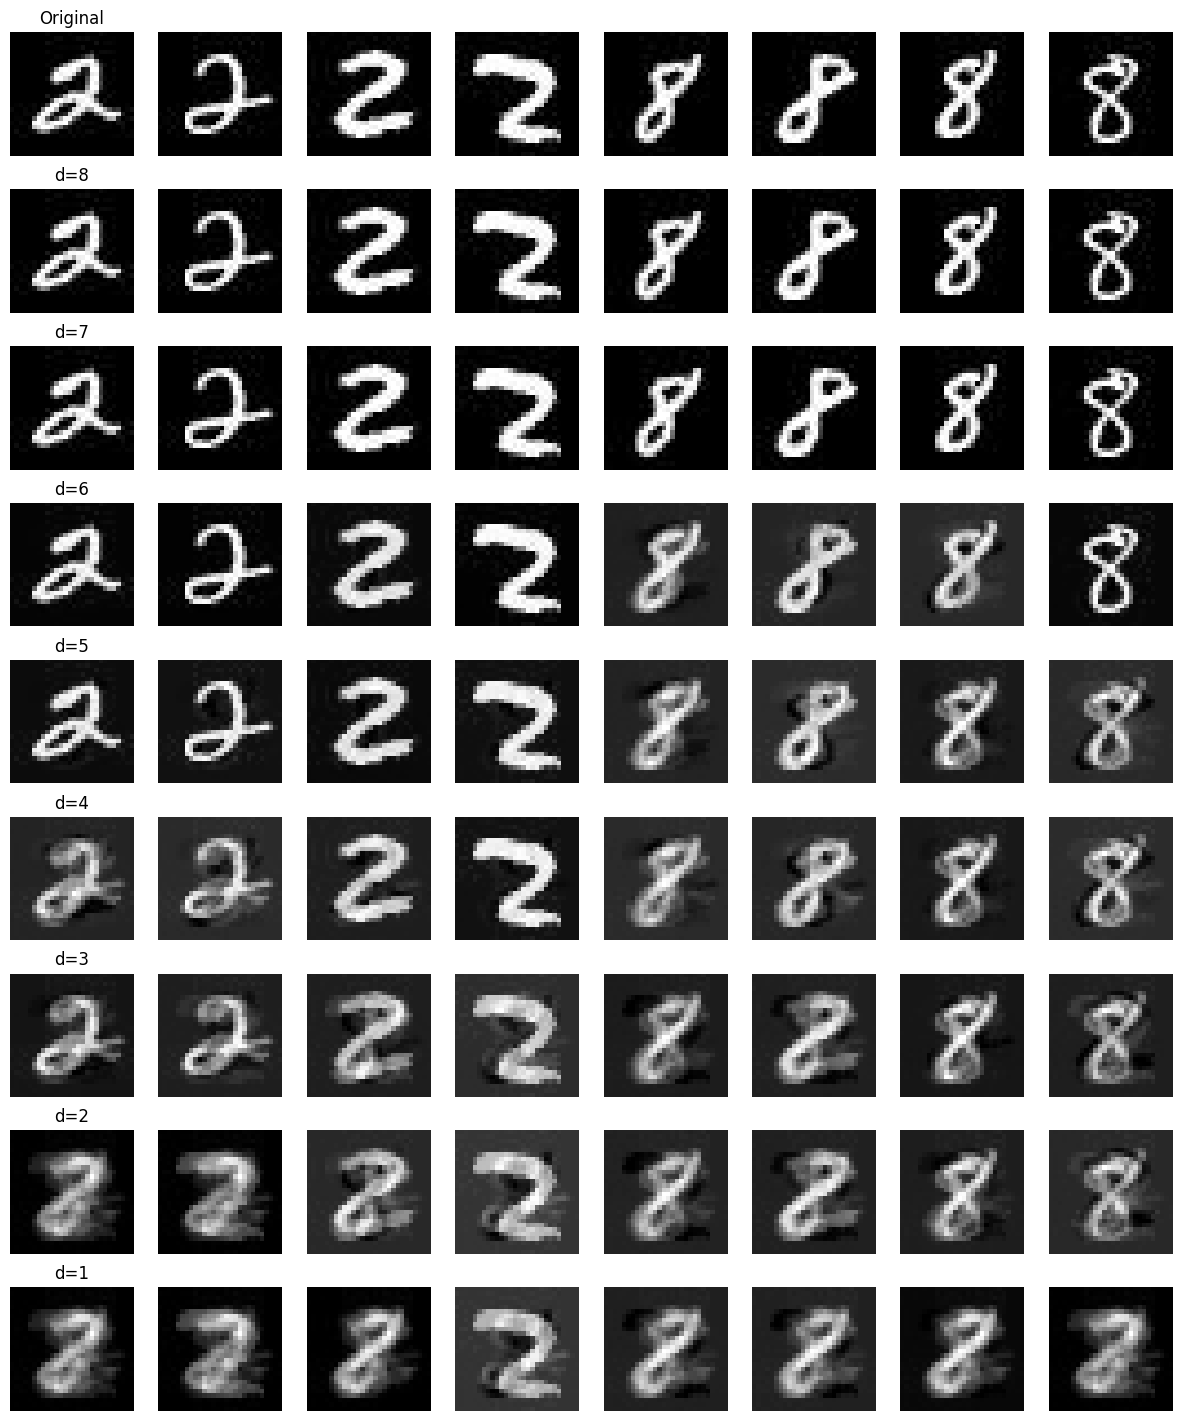

In [77]:
# 4 graficar imagenes 2
images = load_images_from_folder('datasets_imgs_02')
images_matrix_02 = np.array(images)

components_list = [8,7,6,5,4,3,2,1]
reconstructed_images_list = []

for n_components in components_list:
    images_reconstructed, _, _, _ = pca_svd(images_matrix_02, n_components)
    reconstructed_images_list.append(images_reconstructed)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix_02, reconstructed_images_list, image_shape, components_list)

In [92]:
#Errores relativos con frobenius
for i, matriz in enumerate(reconstructed_images_list):
    print(f'Dimension: {components_list[i]}, error relativo: {np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro")}')

Dimension: 8, error relativo: 1.0020767868296916e-15
Dimension: 7, error relativo: 9.946566906495886e-16
Dimension: 6, error relativo: 0.12888961116653602
Dimension: 5, error relativo: 0.2350310178319412
Dimension: 4, error relativo: 0.3182377683127816
Dimension: 3, error relativo: 0.3983955930947508
Dimension: 2, error relativo: 0.4738492494264863
Dimension: 1, error relativo: 0.5478651086442488


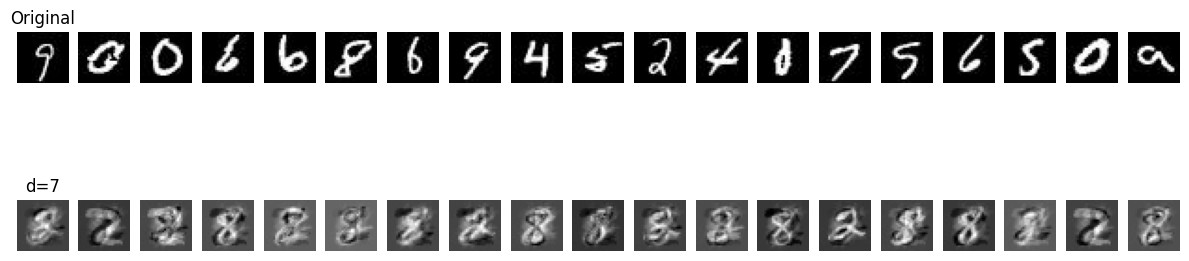

In [80]:
#4 graficar imagenes 1 con vt del 2
matriz_dimension_7 = reconstructed_images_list[1]
matriz_reconstruida_01, _, U_01, S_01  = pca_svd(images_matrix, 7)
matriz_reconstruida_02, Vt_2, _, _ = pca_svd(images_matrix_02, 7)

matriz_01_con_dimension_7 = np.dot(U_01, np.dot(S_01, Vt_2)) + np.mean(images_matrix, axis=0)

show_images_multiple_reconstructions(images_matrix, [matriz_01_con_dimension_7], image_shape, [7])
